In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
import matplotlib.pyplot as plt

from IPython.display import display as d

In [2]:
df = pd.read_csv('iqa_models/iqa.csv')

In [3]:
db_order = sorted(set(df["model"].values))
print(db_order)

['craiyon', 'dall-e', 'glide', 'midjourney', 'own', 'stable_diffusion']


In [4]:
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")


In [5]:
df_ilniqe = df.loc[df['metric'] == 'ILNIQE']

df_niqe = df.loc[df['metric'] == 'NIQE']

df_brisque = df.loc[df['metric'] == 'BRISQUE']

df_musiq = df.loc[df['metric'] == 'MUSIQ']

df_dbcnn = df.loc[df['metric'] == 'DBCNN']

df_maniqa = df.loc[df['metric'] == 'MANIQA']

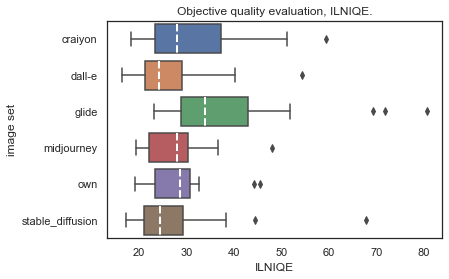

In [6]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_ilniqe,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
)
ax.set_ylabel("image set")
ax.set_xlabel("ILNIQE")
save_fig(ax, "Objective quality evaluation, ILNIQE.", "ilniqe_quality.pdf")

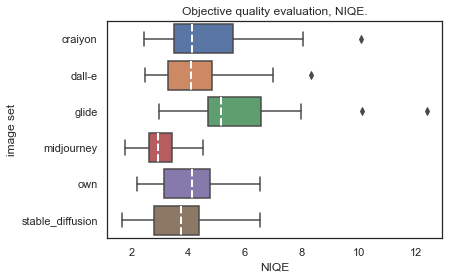

In [7]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_niqe,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
)
ax.set_ylabel("image set")
ax.set_xlabel("NIQE")
save_fig(ax, "Objective quality evaluation, NIQE.", "niqe_2_quality.pdf")


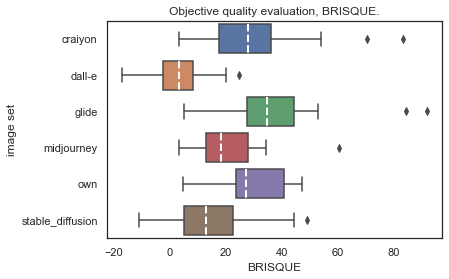

In [8]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_brisque,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
)
ax.set_ylabel("image set")
ax.set_xlabel("BRISQUE")
save_fig(ax, "Objective quality evaluation, BRISQUE.", "brisque_quality.pdf")



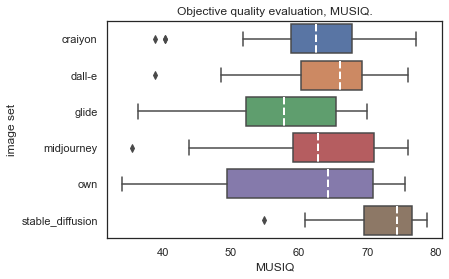

In [9]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_musiq,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
)

ax.set_ylabel("image set")
ax.set_xlabel("MUSIQ")
save_fig(ax, "Objective quality evaluation, MUSIQ.", "musiq_quality.pdf")



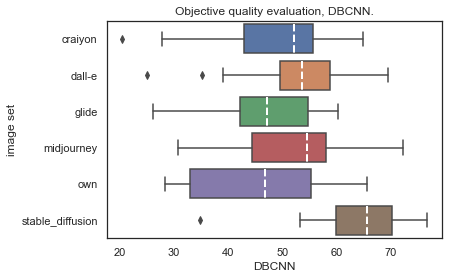

In [10]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_dbcnn,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
)

ax.set_ylabel("image set")
ax.set_xlabel("DBCNN")
save_fig(ax, "Objective quality evaluation, DBCNN.", "dbcnn_quality.pdf")


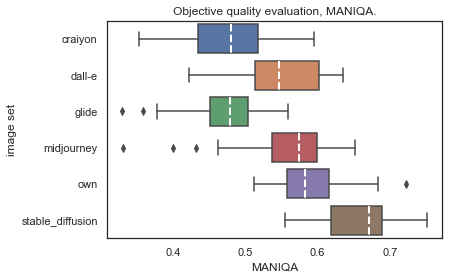

In [11]:
ax = sns.boxplot(
    x='quality_score',
    y='model', 
    data=df_maniqa,
    order=db_order,
    medianprops={"color": "white", "lw":2, "linestyle":"--"},
) 
ax.set_ylabel("image set")
ax.set_xlabel("MANIQA")
save_fig(ax, "Objective quality evaluation, MANIQA.", "maniqa_quality.pdf")


In [12]:
# table wide format
table_res = []
for model, dm in df.groupby(by="model"):
    val = {
        "model": model
    }
    for metric, dg in dm.groupby(by="metric"):
        val[metric + "_mean"] = dg["quality_score"].mean()
        val[metric + "_median"] = np.median(dg["quality_score"])
        val[metric + "_std"] = dg["quality_score"].std()

    table_res.append(val)
    
    
dt = pd.DataFrame(table_res)

d(dt)

,model,BRISQUE_mean,BRISQUE_median,BRISQUE_std,DBCNN_mean,DBCNN_median,DBCNN_std,ILNIQE_mean,ILNIQE_median,ILNIQE_std,MANIQA_mean,MANIQA_median,MANIQA_std,MUSIQ_mean,MUSIQ_median,MUSIQ_std,NIQE_mean,NIQE_median,NIQE_std
0,craiyon,29.377396,27.760620,18.057167,48.965254,52.221085,10.453497,31.115919,28.088212,9.971826,0.477096,0.480175,0.065565,61.871432,62.412231,10.111881,4.673554,4.118951,1.814924
1,dall-e,3.224212,3.161255,9.929413,53.535440,53.612263,9.890627,26.623112,24.215094,7.986359,0.547578,0.546209,0.056285,63.530234,65.956062,8.394497,4.329393,4.100277,1.363282
2,glide,36.755125,34.676697,18.856279,46.923827,47.189545,9.578922,38.802695,33.928481,14.747888,0.472407,0.479383,0.055214,57.432177,57.707623,9.327350,5.773173,5.165181,1.958061
3,midjourney,20.202680,18.315002,11.765970,52.718282,54.630882,9.899468,27.208834,27.999914,6.254788,0.550403,0.573714,0.072626,63.243896,62.722141,9.531420,3.061662,2.925586,0.701623
4,own,28.958624,27.218689,14.546200,45.829822,46.912254,13.119836,29.410160,28.651718,8.589749,0.591738,0.582114,0.065342,59.182867,64.260498,13.944459,4.082924,4.119821,1.310468
5,stable_diffusion,13.933085,12.699097,14.341028,64.203464,65.602997,8.933801,27.242032,24.312050,10.446982,0.657348,0.670318,0.051113,72.089838,74.400620,6.126827,3.737664,3.752989,1.136099


In [13]:
df_filtered = df[df["metric"] != "NIQE"]
df_filtered = df_filtered[df_filtered["metric"] != "BRISQUE"]

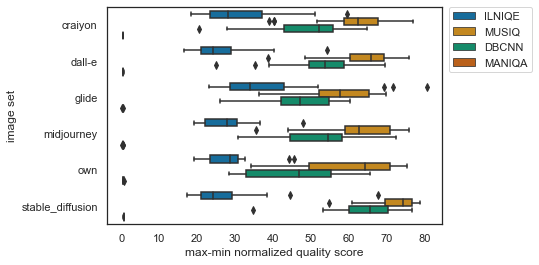

In [14]:

ax = sns.boxplot(
    x='quality_score',
    y='model', 
    hue="metric",
    data=df_filtered,
    order=db_order,
    palette=sns.color_palette("colorblind", n_colors=4)
)
ax.set_ylabel("image set")
ax.set_xlabel("max-min normalized quality score")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [15]:
# table other format, maybe better to plot
table_res = []
for model, dm in df.groupby(by="model"):
    for metric, dg in dm.groupby(by="metric"):
        val = {
            "metric": metric,
            "model": model,
            "mean": dg["quality_score"].mean(),
            "median": np.median(dg["quality_score"]),
            "std": dg["quality_score"].std()
        }
        table_res.append(val)
    
    
dt = pd.DataFrame(table_res)

d(dt)

,metric,model,mean,median,std
0,BRISQUE,craiyon,29.377396,27.760620,18.057167
1,DBCNN,craiyon,48.965254,52.221085,10.453497
2,ILNIQE,craiyon,31.115919,28.088212,9.971826
3,MANIQA,craiyon,0.477096,0.480175,0.065565
4,MUSIQ,craiyon,61.871432,62.412231,10.111881
5,NIQE,craiyon,4.673554,4.118951,1.814924
6,BRISQUE,dall-e,3.224212,3.161255,9.929413
7,DBCNN,dall-e,53.535440,53.612263,9.890627
8,ILNIQE,dall-e,26.623112,24.215094,7.986359
9,MANIQA,dall-e,0.547578,0.546209,0.056285
